In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install pyforest 

In [ ]:
!pip install lazypredict

In [ ]:
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
lazy_imports()

['import altair as alt',
 'import datetime as dt',
 'import nltk',
 'import tensorflow as tf',
 'import pydot',
 'import os',
 'from sklearn import svm',
 'import pickle',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.preprocessing import OneHotEncoder',
 'import sklearn',
 'from pathlib import Path',
 'import plotly.express as px',
 'import awswrangler as wr',
 'from openpyxl import load_workbook',
 'import matplotlib as mpl',
 'import statistics',
 'from sklearn.ensemble import RandomForestClassifier',
 'import xgboost as xgb',
 'from pyspark import SparkContext',
 'import pandas as pd',
 'import seaborn as sns',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import re',
 'import tqdm',
 'import spacy',
 'from dask import dataframe as dd',
 'import keras',
 'import dash',
 'import bokeh',
 'import lightgbm as lgb',
 'import matplotlib.pyplot as plt',
 'import plotly.graph_objs as go',
 'from sklearn.manifold import TSNE',
 'from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
url = ('https://github.com/bittenks/csv-soybean-corn/raw/main/USDA_soybean_2014to2021%20-%20attributes_soybean%20-%20atributes_soybean_2014to02_2020.csv')
soy = pd.read_csv(url)

In [ ]:
soy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            87 non-null     object 
 1   Area Planted                    87 non-null     float64
 2   Area Harvested                  87 non-null     float64
 3   Yield                           87 non-null     float64
 4   Beginning Stocks                87 non-null     float64
 5   Production                      87 non-null     float64
 6   Imports                         87 non-null     float64
 7   Total Supply                    87 non-null     float64
 8   Crushings                       87 non-null     float64
 9   Exports                         87 non-null     float64
 10  Seed                            87 non-null     float64
 11  Residual                        87 non-null     float64
 12  Total Use                       87 non

In [ ]:
soy.describe()

,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Crushings,Exports,Seed,Residual,Total Use,Ending Stocks,World BeginningStocks,World Production,World Imports,World DomesticCrush,World DomesticTotal,World Exports,World EndingStocks,United States BeginningStocks,United States Production,United States Imports,United States DomesticCrush,United States DomesticTotal,United States Exports,United States EndingStocks,Argentina BeginningStocks,Argentina Production,Argentina Imports,Argentina DomesticCrush,Argentina DomesticTotal,Argentina Exports,Argentina EndingStocks,Brazil BeginningStocks,Brazil Production,Brazil Imports,Brazil DomesticCrush,Brazil DomesticTotal,Brazil Exports,Brazil EndingStocks,China BeginningStocks,China Production,China Imports,China DomesticCrush,China DomesticTotal,China Exports,China EndingStocks,Japan BeginningStocks,Japan Production,Japan Imports,Japan DomesticCrush,Japan DomesticTotal,Japan Exports,Japan EndingStocks,Mexico BeginningStocks,Mexico Production,Mexico Imports,Mexico DomesticCrush,Mexico DomesticTotal,Mexico Exports,Mexico EndingStocks,European Union BeginningStocks,European Union Production,European Union Imports,European Union DomesticCrush,European Union DomesticTotal,European Union Exports,European Union EndingStocks,Value,Diff_Value,Average,Diff_Avr
count,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,84.00,84.00,84.00,84.00
mean,84.04,83.25,48.73,400.31,4061.51,24.22,4485.97,1966.95,1924.48,96.94,30.05,4018.37,467.59,87.32,337.00,139.67,289.98,331.43,142.14,90.41,10.89,110.54,0.66,53.53,56.99,52.38,12.73,29.97,54.75,1.82,42.52,47.55,8.37,30.63,21.86,110.32,0.31,41.48,44.58,65.17,22.74,19.10,14.34,86.78,86.26,101.38,0.17,18.67,0.16,0.17,2.22,1.57,2.38,0.00,0.17,0.14,0.36,4.70,4.99,5.04,0.00,0.16,1.00,2.30,14.09,14.83,16.24,0.18,0.98,9.94,0.01,9.93,-0.00
std,4.21,4.24,2.38,271.15,342.37,7.63,412.17,146.42,212.40,4.71,8.26,328.62,205.93,15.67,22.27,18.30,24.24,29.42,17.94,11.19,7.38,9.32,0.21,3.98,4.13,5.78,5.61,3.44,3.01,1.81,2.45,3.48,1.43,3.90,4.68,13.95,0.13,2.67,2.55,13.44,3.93,4.27,2.50,9.38,8.88,11.10,0.06,4.72,0.10,0.11,1.39,0.98,1.49,0.00,0.11,0.05,0.08,0.87,0.84,0.85,0.00,0.07,0.49,0.47,1.13,1.35,1.62,0.08,0.41,1.52,0.67,1.47,0.53
min,76.10,75.00,43.30,92.00,3289.00,15.00,3454.00,1685.00,1495.00,87.00,0.00,3304.00,120.00,57.79,284.05,105.20,238.67,269.00,108.22,66.31,2.50,89.51,0.41,45.86,48.43,40.69,3.25,22.40,40.00,0.00,36.60,38.60,4.20,24.35,15.05,87.50,0.15,37.00,40.10,44.00,15.45,12.38,11.50,69.00,68.35,79.65,0.10,12.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.22,3.60,3.85,3.89,0.00,0.07,0.20,1.13,12.30,12.23,13.15,0.06,0.30,8.09,-2.50,8.41,-2.11
25%,82.90,82.05,47.30,191.00,3865.00,18.50,4172.50,1870.00,1772.50,92.00,29.50,3723.00,390.00,76.02,320.08,124.80,272.88,311.39,128.13,82.87,5.21,105.19,0.50,50.89,54.43,48.24,10.61,27.54,53.50,0.00,40.86,46.60,8.00,27.65,18.11,100.00,0.20,39.77,42.89,56.73,19.71,16.12,12.20,79.75,79.88,92.45,0.13,14.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.29,4.05,4.28,4.33,0.00,0.11,0.59,2.04,13.00,13.80,15.05,0.10,0.61,8.87,-0.30,8.92,-0.18
50%,83.70,83.00,48.50,345.00,4125.00,25.00,4528.00,1950.00,1900.00,96.00,32.00,4092.00,445.00,93.21,338.97,147.95,300.65,343.78,149.17,90.17,9.40,112.26,0.68,53.07,56.51,51.71,12.12,29.35,55.50,1.50,43.00,48.75,8.20,29.81,20.40,107.00,0.30,42.00,45.05,64.00,22.41,19.19,14.00,87.00,86.50,102.70,0.15,18.94,0.21,0.22,2.90,2.02,3.09,0.00,0.24,0.15,0.36,4.30,4.72,4.76,0.00,0.14,1.02,2.48,14.00,14.80,16.29,0.20,0.93,9.54,0.02,9.64,0.01
75%,89.00,88.10,50.20,524.00,4308.50,30.00,4754.50,2105.00,2065.00,101.00,35.00,4252

In [ ]:
soy = soy.drop(columns=['Date'])

In [ ]:

soy.replace([np.inf, -np.inf], np.nan, inplace=True)
soy.dropna(inplace=True)

In [ ]:

X = soy.drop(columns=['Average', 'Value','Diff_Value','Diff_Avr'])
y = soy.Average


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [ ]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 76%|███████▌  | 32/42 [00:04<00:01,  8.95it/s]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 63.


100%|██████████| 42/42 [00:05<00:00,  8.20it/s]

                                            Adjusted R-Squared  \
Model                                                            
Lars                          17333528813475195956475461632.00   
KernelRidge                                              17.83   
GaussianProcessRegressor                                  9.01   
TransformedTargetRegressor                                1.62   
LinearRegression                                          1.62   
DummyRegressor                                            1.41   
LassoLars                                                 1.41   
Lasso                                                     1.41   
LarsCV                                                    1.27   
ElasticNet                                                1.27   
MLPRegressor                                              1.23   
PassiveAggressiveRegressor                                1.22   
GammaRegressor                                            1.20   
LassoLarsI

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
def rmse(model, y_test, y_pred, X_train, y_train):
  r_squared = model.score(X_test, y_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print('R-squared:  '+ str(r_squared))
  print('Mean Squared Error: '+ str(rmse))

In [ ]:
def scatter_plot(y_test, y_pred, model_name):
   plt.figure(figsize=(10,6))
   sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
             line_kws={'lw': 2, 'color': 'r'})
   plt.title(str('test vs predict for '+ model_name))
   plt.xlabel('Average',fontsize=16)
   plt.xticks(fontsize=13)
   plt.yticks(fontsize=13)
   plt.show()

In [ ]:
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [ ]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared:  0.86359325585057
Mean Squared Error: 0.5904778161300619


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

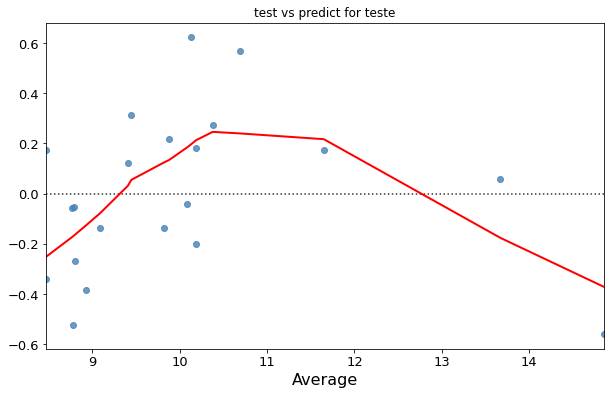

In [ ]:
scatter_plot(y_test, y_pred,'teste')